Plot saved as 3d_plot_hd.png


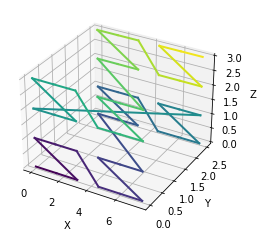

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Read points from a text file
def read_points(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    # Parse the points (skip the first column as it's just an index)
    points = np.array([list(map(float, line.split()[1:])) for line in lines])
    return points

# Visualize the 3D points with hue-changing line
def plot_3d_line_with_hue(points, save_path=None):
    # Create segments from the points
    segments = np.array([points[i:i + 2] for i in range(len(points) - 1)])
    
    # Create a colormap for the segments
    norm = Normalize(vmin=0, vmax=len(points) - 1)
    cmap = cm.get_cmap('viridis')
    colors = [cmap(norm(i)) for i in range(len(segments))]
    
    # Plot the line in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Add each segment with its corresponding color
    for i, segment in enumerate(segments):
        xs, ys, zs = zip(*segment)
        ax.plot(xs, ys, zs, color=colors[i], linewidth=2)

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Save or show the plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Plot saved as {save_path}")
    else:
        plt.show()

# Main script
file_path = 'points.txt'  # Replace with the path to your text file
points = read_points(file_path)

# Save the plot as an HD image
save_path = '3d_plot_hd.png'  # Path where the HD image will be saved
plot_3d_line_with_hue(points, save_path)
